# Chapter 4. Vector Spaces and Subspaces

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib widget
from sympy import Matrix
from pprint import pprint

## 31. Axioms of Vector Spaces (What "Space" Really Means)

> The true power of linear algebra comes from abstracting away from coordinates. A vector space is not tied to arrows in physical space - it is any collection of objects that behave like vectors, provided they satisfy certain rules.

These rules are called the axioms of vector spaces

### The Idea of a Vector Space

A vector space is a set of $V$ equipped with two operations:

1. vector addition - combine two vectors in $V$ to get another vector in $V$
2. scalar multiplication - multiple a vector in $V$ by a scalar (number from a field usually $\mathbb{R}$ or $\mathbb{C}$

The magic is that as long as these axioms hold, the objects in V can be treated as vectors. They need not be arrows or coordinate lists they could be polynomial, functions, matrices, or sequences. 

### The Eight Axioms 

Let $u, v, w \in V$ (vectors) and $a, b \in \mathbb{R}$ (scalars). The axioms are:

1. closure under addition: $u + v \in V$
2. commutativity of addition $u + v = v + u$
3. associativity of addition $(u + v) + w = u + (v + w)$
4. existence of additive identity (exists a zero vec such that $v + 0 = v$)
5. existence of additive inverses (for every $v$, there is $-v$ such that $v+(-v) = 0$
6. closure under scalar multiplication - $av \in V$
7. distributivity of scalar mult over vec addition: $a(u + v) = av + bv$
8. distributivity of scalar mult over scalar addition: $(a+b)v = av + bv$
9. associativity of scalar multiple: $a(bv) = (ab)v$
10. existence of multiplicative identity: $1 \cdot v = v$

### Examples of Vector Spaces

1. Euclidean spaces: $\mathbb{R}^n$ with standard addition and scalar mult
2. Polynomials: the set of all polynomials with real coeff $\mathbb{R}[x]$
3. Functions: set of all cont functions on $[0, 1]$ with addition functions and scalar mult
4. Matrices: set of all $m \times n$ matrices with real entries
5. Sequences: set of all infinite real sequences $(a_1, a_2, ...)$ 

### Examples of Non-Vector Spaces

1. Set of natural numbers $\mathbb{N}$ is not a vector space. No additive inverses... because natural numbers are basically just 0,1,2,3... and sometimes not 0.
2. Set of positive real numbers $\mathbb{R}^+$ is not a vector space. Not closed under scalar mult with neg numbers.
3. Set of polynomials of degree exactly 2. Not closed under addition. I..e $x^2 + x^2$ is still degree 2, but $x^2 - x^2 = 0$ which is degree 0. 

### Zero Vector

Every vec space must contain a zero vector. In $\mathbb{R}^n$ this is $(0, 0, ... 0_n)$. In poly, it's zero poly. Function spaces it's $f(x) = 0$

### Why This Matters

1. Vector spaces unfiy many areas of math under single framework
2. Generalize $mathbb{R}^n$ to functions, pols, and beyond
3. Axioms guarantee that all the tools of linear algebra - span, basis, dimensino, linear maps - apply
4. Recognizing vector spaces in disguise is a major step in advanced math / physics


## 32. Subspaces, Column Space, and Null Space (Where Solutions Live)

So one important result of this is that smaller vector spaces live inside bigger ones. 

Subspaces are central in linear algebra because they reveal the internal structure of matrices and linear systems. Two special subspaces - column space and null space - play particularly important roles. 

### What is a Subspace?

A subspace $W$ of a vector space $V$ is a subset of $V$ that is itself a vector space under the same operations. To qualify as a subspace, $W$ must satisfy:

1. the zero vector is in $W$
2. if $u,v \in W$ then $u + v \in W$ (closed under addition)
3. if $u \in W$ and $c$ is a scalar, then $cu \in W$ (closed under scalar multiplication)

That's it no further checking of all ten vector space axioms is needed, because those are inherited. 

### The Column Space of a Matrix

Given a matrix $A$, the column space is the set of all linear combinations of its columns. Formally, 

$$ C(A) = \{ Ax: x \in \mathbb{R}^n\} $$

* column space lives inside $\mathbb{R}^m$ if $A$ is $m \times n$
* represents all possible outputs of the linear xfrom defined by $A$
* dimension is equal to the rank of $A$

Example:

$$ A =
\begin{bmatrix}
1 & 2 \\
2 & 4 \\
3 & 6 
\end{bmatrix}
$$

the cols are multiples so column space is all multiples of col vec (1,2,3) which is a line in R^3 and rank = 1.


### Null Space of a Matrix

$A$ is the set of all vectors $x$ such that:
$$ A x = 0 $$

* lives in $\mathbb{R}^n$ if $A$ is $m \times n$
* represents the invisible directions that collapse to zero under xform
* dimension is the nullity of $A$


### Why It Matters

> 1. Subspaces are the natural habitat of linear algebra: almost everything happens inside them.
> 1. The column space explains what systems are solvable.
> 2. The null space explains why some systems have multiple solutions (free variables).
> 3. These ideas extend to advanced topics like eigenvectors, SVD, and differential equations.

## 33. Span and Generating Sets

> The idea of a span captures the simplest and most powerful way to build new vectors from old ones: by taking linear combinations. A span is not just a set of scattered points, but a structured, complete collection of all combinations of a given set of vectors. Understanding span leads directly to the concepts of bases, dimensions, and structure of subspaces.

### Definition of Span

Given vectors $v_1, v_2, ..., v_k \in V$, the span of these vectors is:

$$ \text{span}\{v_1, v_2, ..., v_k\} = \{a_1 v_1 + a_2 v_2 + ... + a_k v_k : a_i \in \mathbb{R} \}$$

* a span is the set of all possible linear combos of the vectors
* it's always a subspace
* the given vectors are called a generating set

### Span as Coverage

* if you think of vectors as directions, the span is everything you can reach by walking in those directions, with any step lengths allowed
* if you have only one direction, you can walk back and forth on a line
* withj two independent directions, you can sweep out a plan
* with three, you can move anywhere

### Span and Linear Systems

Considering $Ax = b$, the question:
* is there a solution === is $b$ in the span of the columns of $A$

In [2]:
u = np.array([1, 0])
v = np.array([0, 1])

M = Matrix.hstack(Matrix(u), Matrix(v))
pprint(M)
print("Rank:", M.rank())

Matrix([
[1, 0],
[0, 1]])
Rank: 2


Because rank = 2, the span of $\{u,v\}$ is all of $\mathbb{R}^2$

In [3]:
u = np.array([1, 2])
v = np.array([2, 4])

M = Matrix.hstack(Matrix(u), Matrix(v))
pprint(M)
print("Rank:", M.rank())

Matrix([
[1, 2],
[2, 4]])
Rank: 1


Visualizing a span

Matrix([
[1, 2],
[2, 1]])
Rank: 2


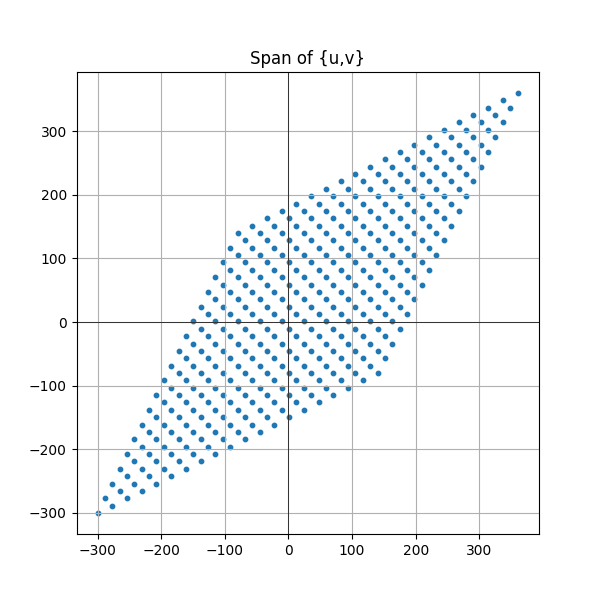

In [8]:
u = np.array([1, 2])
v = np.array([2, 1])

M = Matrix.hstack(Matrix(u), Matrix(v))
pprint(M)
print("Rank:", M.rank())

coeffs = np.linspace(-100, 120, 20)
points = []
for a in coeffs:
    for b in coeffs:
        points.append(a*u + b*v)
points = np.array(points)

plt.cla()
plt.scatter(points[:,0], points[:,1], s=10)
plt.axhline(0,color='black',linewidth=0.5)
plt.axvline(0,color='black',linewidth=0.5)
plt.title("Span of {u,v}")
plt.grid()
plt.show()

rank: 2  det: -2.9999999999999996


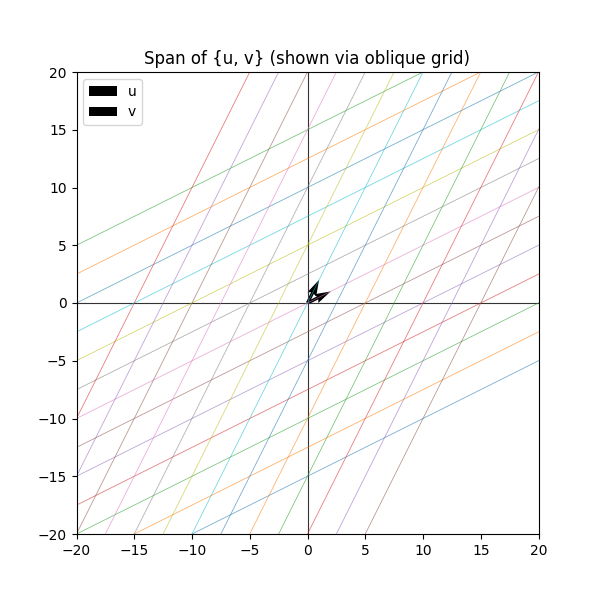

In [5]:
u = np.array([1.0, 2.0])
v = np.array([2.0, 1.0])
A = np.column_stack([u, v])  # [[1,2],[2,1]]

# quick sanity check
print("rank:", np.linalg.matrix_rank(A), " det:", np.linalg.det(A))

# plot settings (viewport only; span itself is unbounded)
extent = 20
nlines = 13
t = np.linspace(-extent, extent, 800)
shifts = np.linspace(-10, 10, nlines)

plt.figure(figsize=(6,6))
plt.axhline(0, color='0.2', lw=0.8)
plt.axvline(0, color='0.2', lw=0.8)

# draw the oblique grid:
#   a = const -> {a*u + t*v},    b = const -> {t*u + b*v}
for a in shifts:
    P = a*u[None, :] + t[:, None]*v[None, :]
    plt.plot(P[:,0], P[:,1], lw=0.6, alpha=0.6)
for b in shifts:
    Q = t[:, None]*u[None, :] + b*v[None, :]
    plt.plot(Q[:,0], Q[:,1], lw=0.6, alpha=0.6)

# draw basis vectors
origin = np.array([0.0, 0.0])
plt.quiver(*origin, *u, angles='xy', scale_units='xy', scale=1, width=0.007, label='u')
plt.quiver(*origin, *v, angles='xy', scale_units='xy', scale=1, width=0.007, label='v')

plt.xlim(-extent, extent); plt.ylim(-extent, extent)
plt.gca().set_aspect('equal', 'box')
plt.title("Span of {u, v} (shown via oblique grid)")
plt.grid(False)
plt.legend(loc='upper left')
plt.show()


## 34. Linear Independence and Dependence 

### Definition of Linear Independence 

A set of vectors $\{ v_1, v_2, ..., v_k \}$ is linearly independent if the only solution to:

$$ a_1 v_1 + a_2 v_2 + .... + a_k v_k = 0 $$

is 

$$ a_1 = a_2 = ... = a_k = 0 $$

if there exists a non-trivial solution, then the vecs are linearly independent. 

### Intuition

* indep vectors point in genuinely different directions
* dependent vecs overlap

### Relationship with Dimension

* in $\mathbb{R}^n$, at most $n$ independent vectors exist
* if you have more than $n$, dependence is guaranteed
* a basis of a vector space is simply a maximaml independent set that spans the space

### Geometric Interpretation

* independent vec = diff directions
* dependent vec = one vec lies in the span of the others
* in 2D, two indep span the plane
* in 3D, three indep span the space

## 35. Basis and Coordinates

**A basis gives us the minimal set of building blocks needed to generate an entire vector space, with no redundancy.** Once a basis is chosen, every vec can be described uniquely by a list of numbers called its coordinates. 

### What is a Basis?

A set of vectors that satisfies:

1. spanning property: $\text{span}\{v_1, ... v_k\} = V$
2. independent property: all those vecs above are linearly independent

### Geometric Intrepetation

* a basis is like setting up coordinate axes in a space
* in 2D, two independent vectors define a grid
* in 3D, three independent vectors define a full coord system

It's like translating languages when we change basis.

In [10]:
v1 = Matrix([1,2,3])
v2 = Matrix([2,4,6])
v3 = Matrix([1,0,1])

M = Matrix.hstack(v1,v2,v3)
print("Column space basis:")
pprint(M.columnspace())

Column space basis:
[Matrix([
[1],
[2],
[3]]), Matrix([
[1],
[0],
[1]])]


In [15]:
B = Matrix.hstack(Matrix([1,0]), Matrix([0,1]))
target = Matrix([3,5])

coords = B.solve_least_squares(target)
print("Coordinates in basis B:", coords)

B = Matrix.hstack(Matrix([1,0]), Matrix([1,1]))
target = Matrix([3,5])

coords = B.solve_least_squares(target)
print("Coordinates in basis B:", coords)

Coordinates in basis B: Matrix([[3], [5]])
Coordinates in basis B: Matrix([[-2], [5]])


## 36. Dimension

One of the most profound and unifying ideas in linalg. Captures the _size_ or _capacity_ of a vector space. How many independent directions it has. 

### Definition 

The dimension of a vector space $V$ is the number of vectors in any basis of $V$. 

* since all bases of a vector space have the same number of elements, dimension is well-defined
* if $\text{dim}(V) = n$ then
  - every set of more than $n$ vectors in V is dependent
  - every set of exactly $n$ independent vectors forms a basis

### Dimensions and Systems of Equations 

When solving $Ax = b$:
* the dimension of the col space = rank = num independent directions in outputs
* the dimension of the null space = number of free variables
* by the rank-nullity theorem:
  - dim(col space) + dim (null space ) = num variables 

## 37. Rank-Nullity Theorem

Rank-nullity theorem is one of the central results of linear algebra. It gives a precise balance between two fundamental aspects of a matrix: the dimension of its column space (rank) and the dimension of its null space (nullity). 

It shows that no matter how complicated a matrix looks, the distribution of information between its visible outputs and its hidden null directions always obeys a strict law. 

### Statement of the Theorem

Let $A$ be an $m \times n$ matrix (mapping $\mathbb{R}^n \rightarrow \mathbb{R}^m$ ):
$$ \text{rank}(A) + \text{nullity}(A) = n $$

where:
* rank(A) = dimension of the col space of $A$
* nullity(A) = dimension of the null space of $A$
* n = number of columsn of $A$ i.e. the number of variables

### Intuition

think of a matrix as a machine that transforms input vecs into outputs... well then,

* rank measures how many indep output directions survive
* nullity measures how many input directions get lost (mapped to zero)
* theorem says: total inputs = useful directions (rank) + wasted directions (nullity)

### Why It Matters

* rank-nullity theorem connects the abstract ideas of rank and nullity into a single, elegant formula
* ensures conversation of dimension: no information magically appears or disappears
* essnetial in understanding solutions of systems, dimensions of subspaces, and the structure of linear xforms
* prepares for deeper results in algebra topology and diffeq

In [16]:
A = Matrix([
    [1, 2, 3],
    [2, 4, 6],
    [1, 0, 1]
])

rank = A.rank()
nullity = len(A.nullspace())
print("Rank:", rank)
print("Nullity:", nullity)
print("Rank + Nullity =", rank + nullity)
print("Number of columns =", A.shape[1])


Rank: 2
Nullity: 1
Rank + Nullity = 3
Number of columns = 3


In [17]:
np.random.seed(3)
R = Matrix(np.random.randint(-3,4,(4,5)))
print("Random 4x5 matrix:\n", R)
print("Rank + Nullity =", R.rank() + len(R.nullspace()))
print("Number of columns =", R.shape[1])

Random 4x5 matrix:
 Matrix([[-1, -3, -2, 0, -3], [-3, -3, 2, 2, 0], [-1, 0, -2, -2, -1], [2, 3, -3, 1, 1]])
Rank + Nullity = 5
Number of columns = 5


## 38. Coordinates Relative to a Basis

Once a basis for a vector space is chosen, every vector in that space can be described uniquely in terms of the basis. Coordinates xfrom abstract vecs into concrete lists of numbers. 

Not going to explore this too much but we hinted at it above. 

THis is a goo dportion though:

### Matrix Formulation

If $B = \{ v_1, ..., v_n \}$ then

$$ P = [ v_1 v_2 ... v_n ]$$

then for a vector $x$, it's coordinate vec $[ x ]_B$ statisfies

$$ P[x]_B = x $$

thus

$$ [x]_B = P^{-1} x $$

### Changing Coordinates

Suppose a vector has coordinates $[x]_B$ relative to basis $B$, if we switch to another basis $C$ we use a change of basis matrix to convert coordinates:

$$ [x]_C = \left( P_C^{-1} P_B \right) [x]_B $$

## 39. Change of Basis Matrices

The general principle here is that we're changing our basis. We generally use a change of basis matrix, which is like a translator between coordinate systems. 

### General Formula with Basis Matrices

$$ P_B = [b_1 b_2 ... b_n] , P_C = [ c_1 c_2 ... c_n] $$

then the change-of-basis matrix from B to C is:

$$ P_{B \rightarrow C} = P_C^{-1} P_B $$


## 40. Affine Subspaces

In many real world scenarios, we deal with shifted versions of these spaces:
* planes not passing through the origin
* lines offset from zero vec
* solutions sets to linear equations

### Definition

An affine subspace of a vector space $V$ is a set of the form:

$$ x_0 + W = \{ x_0 + w: w \in W\}$$

In other words, an affine subspace is simply a subspace shifted by a vector. 

### Geometric Intution

Think of affine subscpaces as flat sheets floating in space. 

They preserve the shape and the direciton, but not the position. 

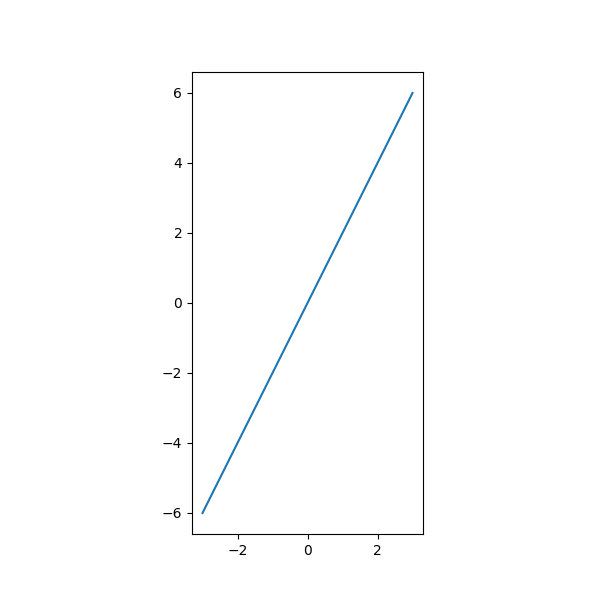

In [21]:
t = np.linspace(-3,3,20)
line_origin = np.array([t, 2*t]).T
plt.cla()
plt.plot(line_origin[:,0], line_origin[:,1], label="Through origin")
plt.show()

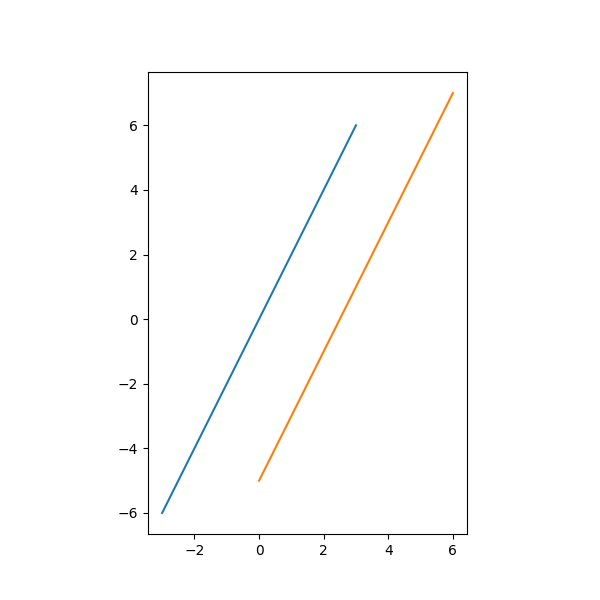

In [22]:
point = np.array([3,1])
direction = np.array([1,2])
line_shifted = np.array([point + k*direction for k in t])
plt.plot(line_shifted[:,0], line_shifted[:,1], label="Shifted line")
plt.show()

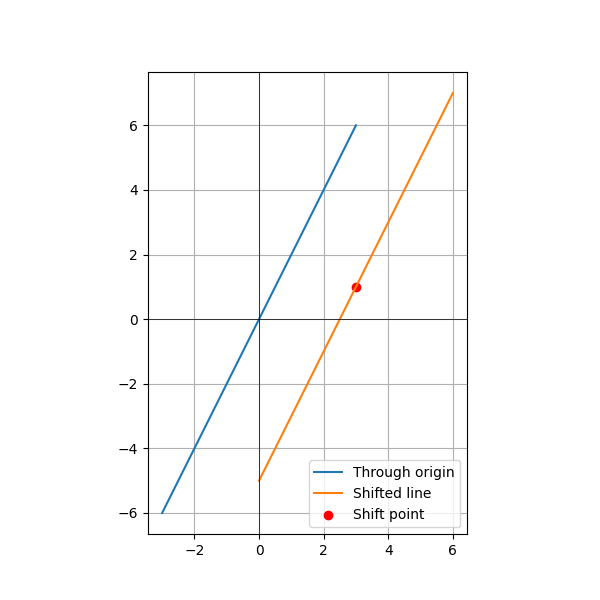

In [23]:
plt.scatter(*point, color="red", label="Shift point")
plt.axhline(0,color='black',linewidth=0.5)
plt.axvline(0,color='black',linewidth=0.5)
plt.legend()
plt.grid()
plt.show()

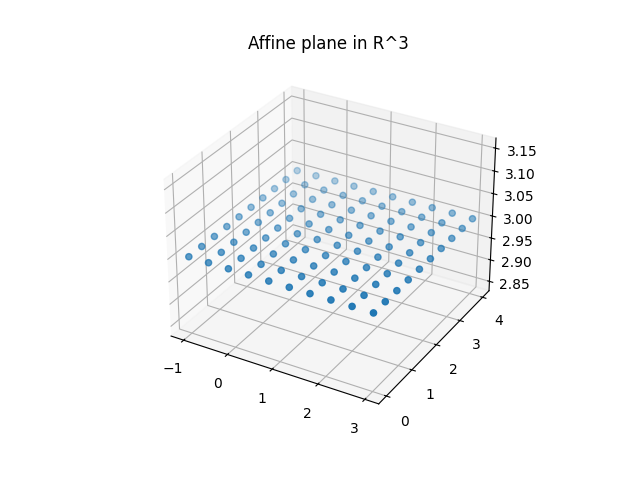

In [24]:
s_vals = np.linspace(-2,2,10)
t_vals = np.linspace(-2,2,10)

points = []
for s in s_vals:
    for t in t_vals:
        points.append([1,2,3] + s*np.array([1,0,0]) + t*np.array([0,1,0]))

points = np.array(points)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:,0], points[:,1], points[:,2])
ax.set_title("Affine plane in R^3")
plt.show()

This is the $\mathbb{R}^3$ plane:
$$ P = \{ [1,2,3] + s[1, 0, 0] + t[0,1,0] : s,t \in \mathbb{R} $$